In [17]:
import pandas as pd
df= pd.read_csv('heart_disease.csv')

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [20]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.865639,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.084982,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.450000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [22]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num = df_num.iloc[:,:]
df_num.head()

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0


In [23]:
df_cat = df.select_dtypes(include=['object'])
df_cat = df_cat.iloc[:,:]
df_cat.head()

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
SS_X = scaler.fit_transform(df_num)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = df_num.columns
SS_X.head()

,age,trestbps,chol,thalch,oldpeak,num
0,1.006027,0.567394,0.281297,0.524183,1.288612,-0.881977
1,-1.397560,0.076967,0.013526,-0.147705,-0.815249,-0.881977
2,0.350503,0.322181,-0.084656,0.449529,-0.449360,-0.881977
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815249,-0.881977
4,0.350503,-1.149102,-0.004325,-0.371668,0.556834,-0.881977


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,sex,cp,restecg,exang,slope,thal
0,1,3,0,0,0,0
1,1,1,1,0,1,0
2,1,0,1,0,1,0
3,1,3,0,0,1,0
4,1,0,1,1,1,0


In [26]:
df_new = pd.concat([SS_X, df_cat], axis=1)
df_new.head()

,age,trestbps,chol,thalch,oldpeak,num,sex,cp,restecg,exang,slope,thal
0,1.006027,0.567394,0.281297,0.524183,1.288612,-0.881977,1,3,0,0,0,0
1,-1.397560,0.076967,0.013526,-0.147705,-0.815249,-0.881977,1,1,1,0,1,0
2,0.350503,0.322181,-0.084656,0.449529,-0.449360,-0.881977,1,0,1,0,1,0
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815249,-0.881977,1,3,0,0,1,0
4,0.350503,-1.149102,-0.004325,-0.371668,0.556834,-0.881977,1,0,1,1,1,0


In [27]:
Y = df['num']
X = df_new

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
#ValueError: Number of labels=726 does not match number of samples=635(to avoid this error in next step)
# Check for duplicate samples
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicate samples found:", duplicates.sum())
    df = df.drop_duplicates()

# Check for missing labels
missing_labels = df['num'].isnull().sum()
if missing_labels > 0:
    print("Missing labels:", missing_labels)
    # Handle missing labels as needed (e.g., impute, remove)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Verify label counts
print("Training labels:", len(y_train.unique()))
print("Testing labels:", len(y_test.unique()))

Training labels: 5
Testing labels: 5


In [51]:
'''ValueError: Input X contains NaN.DecisionTreeClassifier does not accept missing values encoded as NaN natively.
For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing 
values encoded as NaNs natively.from sklearn.impute import SimpleImputer  # Choose another imputer if needed to avoid this i took imputation'''
from sklearn.tree import DecisionTreeClassifier

# ... (Rest of your code for data loading and preprocessing)

# Imputation step
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'constant'
X_train_imputed = imputer.fit_transform(X_train)

# Decision Tree with imputation
dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
dt.fit(X_train_imputed, y_train)

DecisionTreeClassifier()

In [52]:
# Imputation step (assuming you're using SimpleImputer)
from sklearn.metrics import accuracy_score
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'constant'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Impute test data as well

# Predictions and Accuracy calculation
y_pred_train = dt.predict(X_train_imputed)
y_pred_test = dt.predict(X_test_imputed)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [55]:
# cross validation
#=========================================================
import numpy as np

training_acc = []
test_acc = []

for i in range(1,100):
   # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)

    # Imputation step
    imputer = SimpleImputer(strategy='mean')  # Or 'median', 'constant'
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)  # Impute test data as well

    # Train and predict
    dt = DecisionTreeClassifier()
    dt.fit(X_train_imputed, Y_train)
    Y_pred_train = dt.predict(X_train_imputed)
    Y_pred_test = dt.predict(X_test_imputed)

    # Calculate accuracy
    training_acc.append(accuracy_score(Y_train, Y_pred_train))
    test_acc.append(accuracy_score(Y_test, Y_pred_test))

print("Cross validation - Training accuracy:", np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:", np.mean(test_acc).round(2))

Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 1.0


In [56]:
# Count the number of nodes in the tree
node_count = dt.tree_.node_count

# Count the depth of the tree
max_depth = dt.tree_.max_depth

print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)


Number of nodes: 9
Depth of tree: 4


In [59]:
import pandas as pd

# Assuming your target variable is in the 'target' column
class_names = df['num'].unique()
print(class_names)

[0 1 2 3 4]


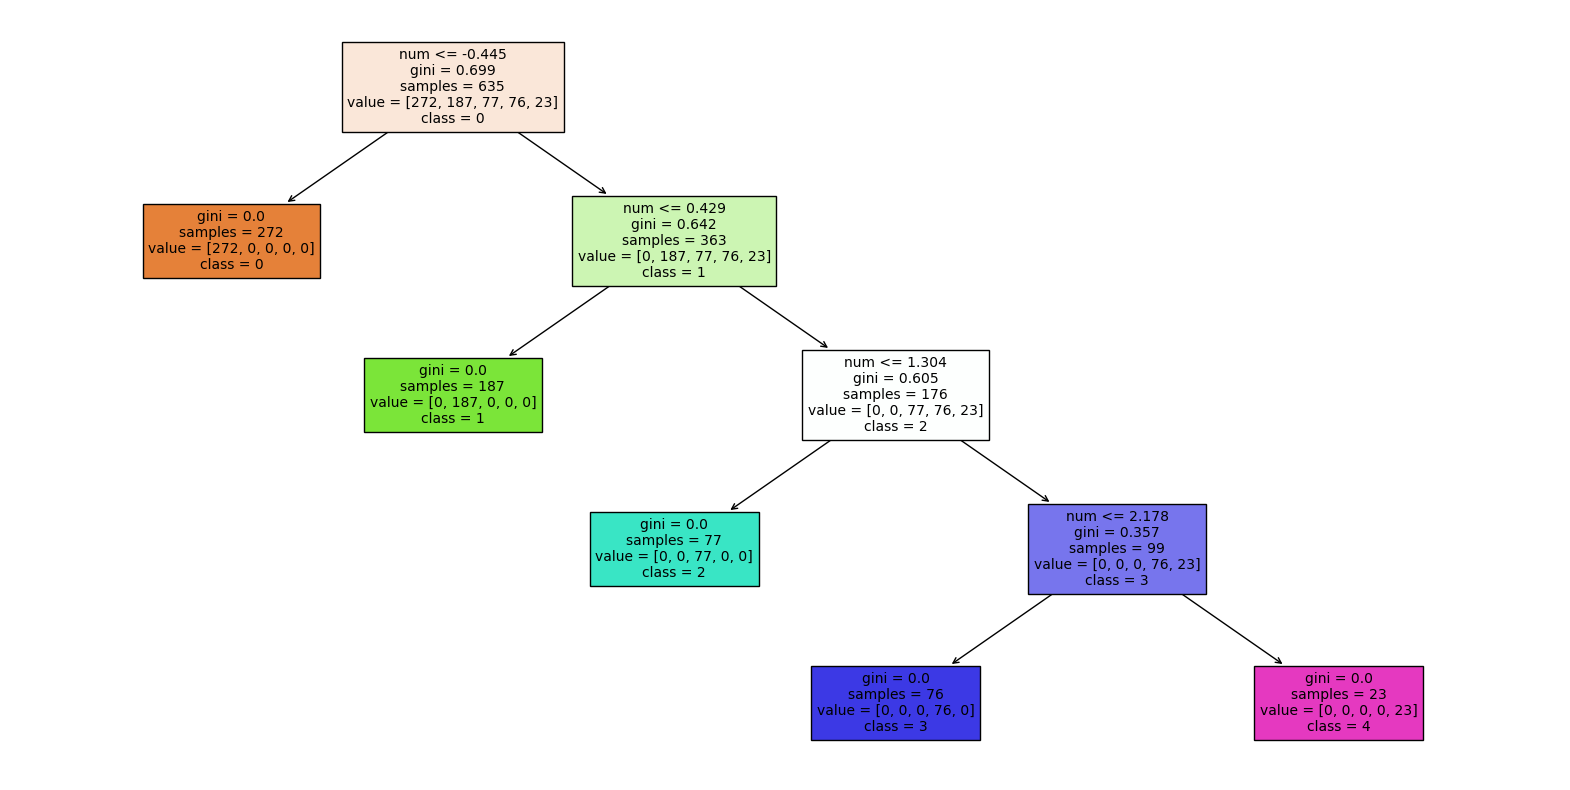

In [60]:
import matplotlib.pyplot as plt

from sklearn import tree

plt.figure(figsize=(20,10))

tree.plot_tree(dt, feature_names=X.columns, class_names=['0','1','2','3','4'], filled=True, fontsize=10)
plt.show()